In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/content/fruitdata.xlsx")

In [3]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [4]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [5]:
df['fruit_label'].value_counts()

1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

In [6]:
df['fruit_label'].value_counts()

1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

In [7]:
df[df['fruit_name']=='mandarin']

,fruit_label,fruit_name,mass,width,height,color_score
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81


In [8]:
print(df.shape)

(59, 6)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [11]:
import seaborn as sns

<ipython-input-12-7d18f16fca9f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

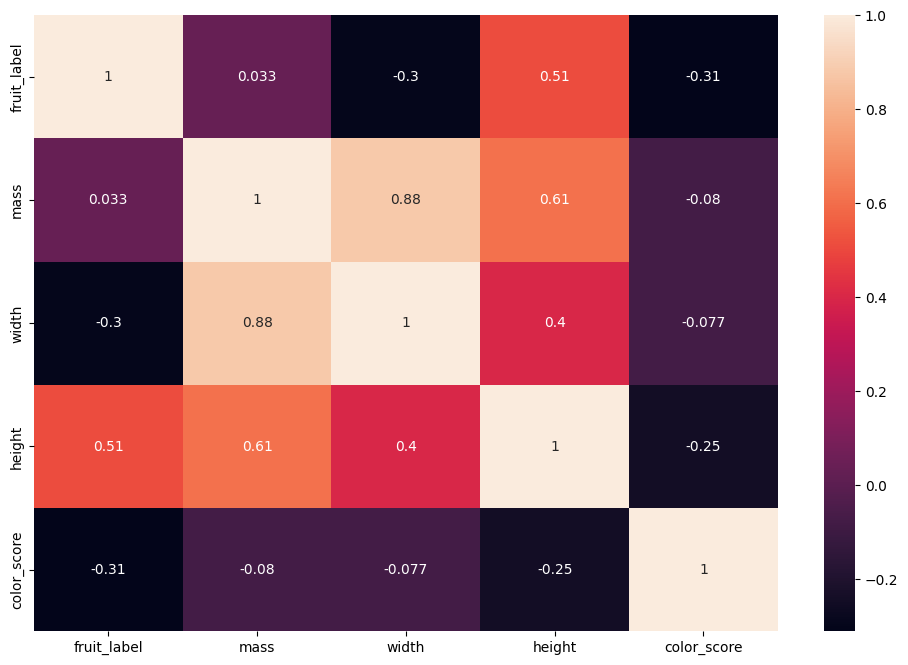

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

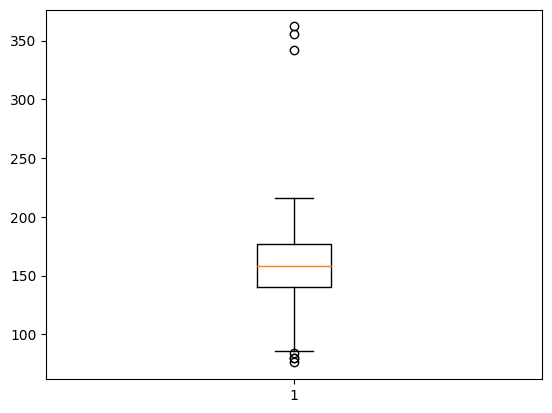

In [13]:
plt.boxplot(df['mass'])
plt.show()

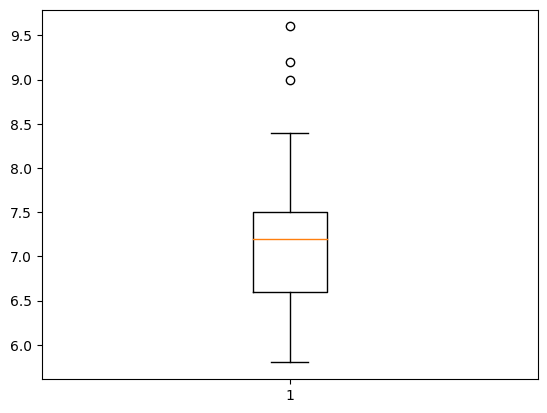

In [14]:
plt.boxplot(df['width'])
plt.show()

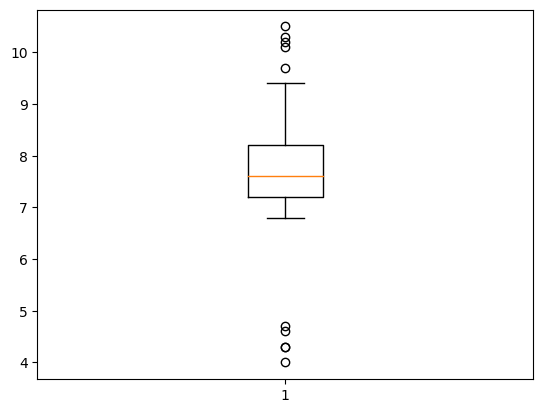

In [15]:
plt.boxplot(df['height'])
plt.show()

In [16]:
print(df['height'].min())
print(df['height'].max())
print(df['height'].mean())

4.0
10.5
7.693220338983052


In [17]:
print(df['width'].min())
print(df['width'].max())
print(df['width'].mean())

5.8
9.6
7.105084745762713


In [18]:
mask1 = df["height"]>np.percentile(df['height'].values,75)+1.5*(np.percentile(df['height'].values,75)
                                                   -np.percentile(df['height'].values,25))

In [19]:
mask2 = df["height"]<np.percentile(df['height'].values,25)-1.5*(np.percentile(df['height'].values,75)
                                                   -np.percentile(df['height'].values,25))

In [20]:
df['height'][mask1]

43    10.3
44    10.5
46    10.2
47     9.7
48    10.1
Name: height, dtype: float64

In [21]:
df['height'][mask2]

3    4.7
4    4.6
5    4.3
6    4.3
7    4.0
Name: height, dtype: float64

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
ct = ColumnTransformer(
    [('ohe',OneHotEncoder(),[0])],
    remainder = 'passthrough'
   )
# List of (name,transformer,column(s)) tuple spe


In [24]:
X=df.iloc[:,1:]

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
b=LabelEncoder()
df["fruit_name"]=b.fit_transform(df["fruit_name"])

In [27]:
X=ct.fit_transform(X)

In [28]:
X.shape

(59, 8)

In [29]:
X[0]

array([  1.  ,   0.  ,   0.  ,   0.  , 192.  ,   8.4 ,   7.3 ,   0.55])

In [30]:
y = df.iloc[:,0].values

In [31]:
y

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train , X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [34]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(47, 8) (12, 8) (47,) (12,)


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
yhat= model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
accuracy_score(y_test,yhat)

1.0

In [39]:
confusion_matrix(y_test,yhat)

array([[3, 0, 0],
       [0, 6, 0],
       [0, 0, 3]])

In [40]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [41]:
df1 =df.iloc[:,2:5]

In [42]:
df1.head()

,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X1_train , X1_test, y1_train,y1_test=train_test_split(df1,y,test_size=0.2,random_state=123)
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(47, 3) (12, 3) (47,) (12,)


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model = DecisionTreeClassifier()
model.fit(X1_train,y1_train)
yhat= model.predict(X1_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
accuracy_score(y1_test,yhat)

0.8333333333333334

In [49]:
print(classification_report(yhat,y1_test))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           3       0.83      0.83      0.83         6
           4       1.00      1.00      1.00         3

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



In [50]:
confusion_matrix(y1_test,yhat)

array([[2, 1, 0],
       [1, 5, 0],
       [0, 0, 3]])

In [51]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,0,192,8.4,7.3,0.55
1,1,0,180,8.0,6.8,0.59
2,1,0,176,7.4,7.2,0.60
3,2,2,86,6.2,4.7,0.80
4,2,2,84,6.0,4.6,0.79


In [52]:
print("Feature Importances:", model.feature_importances_)

Feature Importances: [0.3201373 0.3365723 0.3432904]


In [53]:
print("Classes:", model.classes_)

Classes: [1 2 3 4]


In [54]:
cols = ['mass','width','height','color_score']
cat_names=['S','VS','VR']
print(len(cols), len(cat_names))

4 3


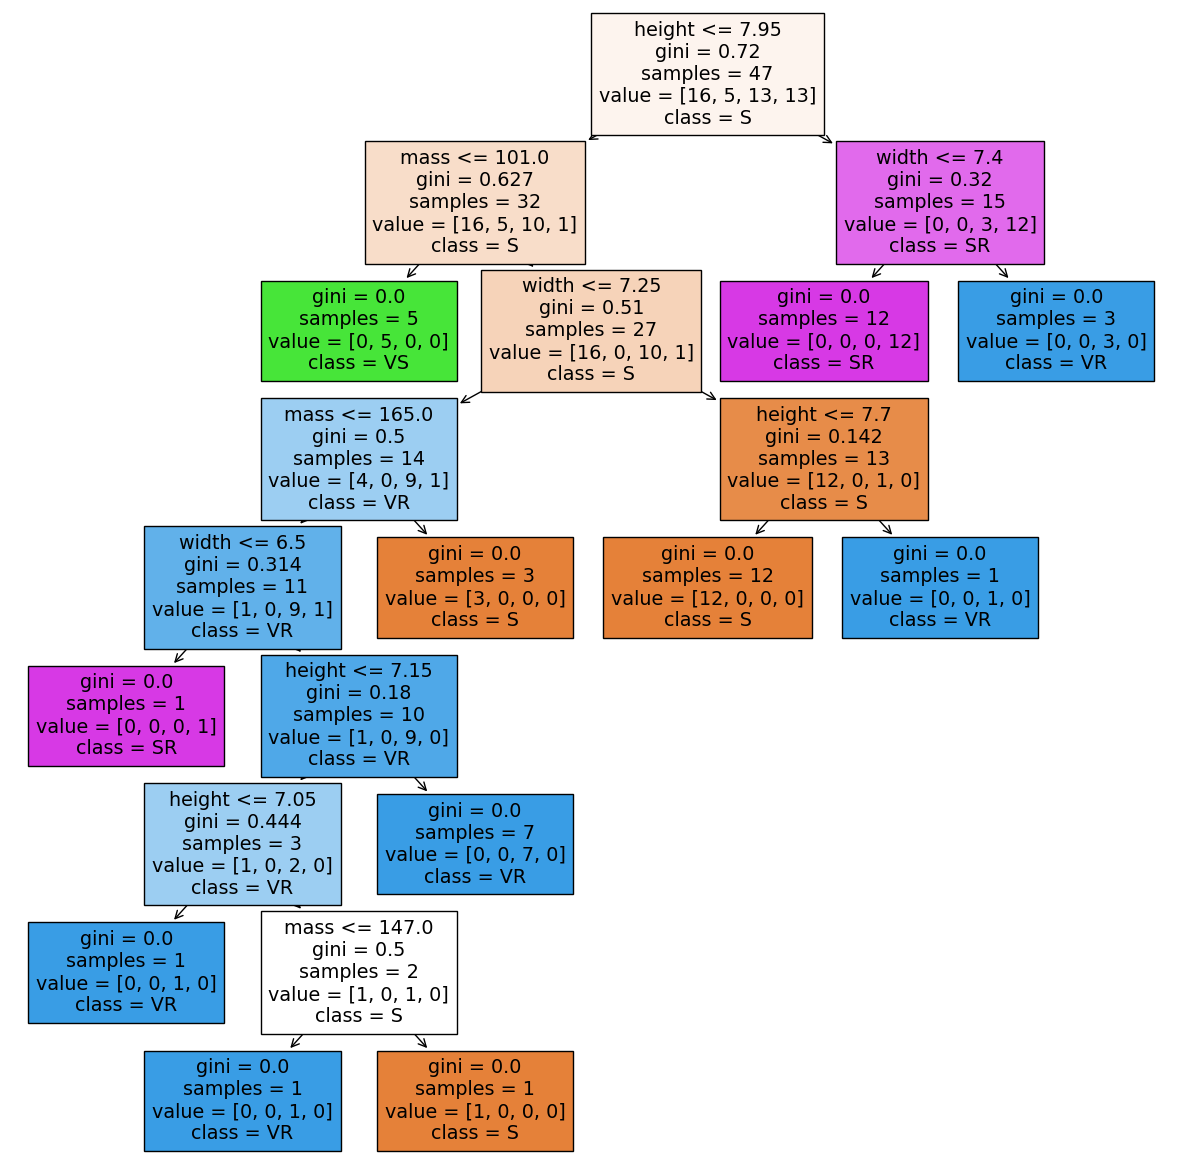

In [55]:
from sklearn import tree
plt.figure(figsize=(15,15))
cols = ['mass','width','height','color_score']
cat_names=['S','VS','VR','SR']
tree.plot_tree(model,
               feature_names = cols,
               class_names = cat_names,
               filled = True)
plt.show()

In [56]:
X2=df.iloc[:,2:5]

In [57]:
X2_train, X2_test , y2_train, y2_test = train_test_split(X2,y,test_size=0.2,random_state=48)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(47, 8) (12, 8) (47,) (12,)


In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model = RandomForestClassifier()  # decisiontreeclasifier
model.fit(X_train,y_train)
yhat= model.predict(X_test)

print(accuracy_score(y_test,yhat))
print(classification_report(yhat,y_test))
model.feature_importances_

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



array([0.23079013, 0.18404312, 0.04002243, 0.1691911 , 0.07679249,
       0.08483858, 0.1215454 , 0.09277675])